<a href="https://colab.research.google.com/github/HARSHGit45/100-days-of-DSA/blob/main/Facial_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mitech/stock2fer")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/mitech/stock2fer/versions/1


In [2]:
!pip install face-recognition -q


In [3]:
!pip install mediapipe -q
!pip install dlib -q
!pip install face-recognition -q
!pip install deepface -q

In [4]:
import cv2
import mediapipe as mp
import glob
import math
import random
from deepface import DeepFace
from IPython.display import display
import matplotlib.pyplot as plt
import os

In [5]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

In [6]:
def process_face_mesh(images):
    drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
    with mp_face_mesh.FaceMesh(
        static_image_mode=True,
        max_num_faces=1,
        refine_landmarks=True,
        min_detection_confidence=0.5
    ) as face_mesh:
        for idx, file in enumerate(images):
            image = cv2.imread(file)
            results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

            if not results.multi_face_landmarks:
                continue

            annotated_image = image.copy()
            for face_landmarks in results.multi_face_landmarks:
                mp_drawing.draw_landmarks(
                    image=annotated_image,
                    landmark_list=face_landmarks,
                    connections=mp_face_mesh.FACEMESH_TESSELATION,
                    landmark_drawing_spec=None,
                    connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style()
                )
                mp_drawing.draw_landmarks(
                    image=annotated_image,
                    landmark_list=face_landmarks,
                    connections=mp_face_mesh.FACEMESH_CONTOURS,
                    landmark_drawing_spec=None,
                    connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style()
                )
                mp_drawing.draw_landmarks(
                    image=annotated_image,
                    landmark_list=face_landmarks,
                    connections=mp_face_mesh.FACEMESH_IRISES,
                    landmark_drawing_spec=None,
                    connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_iris_connections_style()
                )
            cv2.imwrite(f'/content/working/{idx}.png', annotated_image)

In [7]:
def display_images_in_dir(dir_path):
    files = os.listdir(dir_path)
    for file in files:
        if file.endswith(".jpg") or file.endswith(".png"):
            img = cv2.imread(os.path.join(dir_path, file))
            plt.imshow(img, cmap='gray')
            plt.show()

In [45]:
file_path = "/root/.cache/kagglehub/datasets/mitech/stock2fer/versions/1/stock2fer/Sad/*"
paths = sorted(glob.glob(file_path))


In [34]:

def display_face_detection_grid(paths, n_rows=5, n_cols=5):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    for r in range(n_rows):
        plt.figure(figsize=(16, 10))
        for c in range(n_cols):
            ax = plt.subplot(1, n_cols, c + 1)
            current = r * n_cols + c
            if current >= len(paths):
                break
            image = cv2.imread(paths[current])
            image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            faces = face_cascade.detectMultiScale(image_gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

            if len(faces) == 0:
                ax.title.set_text('not detected')
            else:
                for (x, y, w, h) in faces:
                    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 255), 2)
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.xticks([])
            plt.yticks([])
        plt.show()


In [31]:
def display_and_analyze_emotions(paths):
    fig = plt.figure(figsize=(15, 15))

    for idx, i in enumerate([7, 10, 20, 24]):
        plt.subplot(2, 2, idx + 1)

        img = cv2.imread(paths[i])
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

        faces = face_cascade.detectMultiScale(img_rgb, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        if len(faces) > 0:
            (x, y, w, h) = faces[0]
            cv2.rectangle(img_rgb, (x, y), (x+w, y+h), (255, 0, 255), 2)

        try:
            analyze = DeepFace.analyze(img_path=img_rgb, actions=['emotion'], enforce_detection=False)
            dominant_emotion = analyze[0]['dominant_emotion'] if isinstance(analyze, list) else analyze['dominant_emotion']
            plt.title(dominant_emotion)

        except ValueError:
            plt.title("No Face Detected")

        plt.imshow(img_rgb)
        plt.xticks([])
        plt.yticks([])

    plt.show()

In [46]:
process_face_mesh(paths)


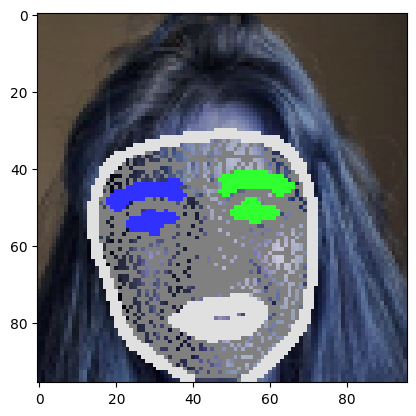

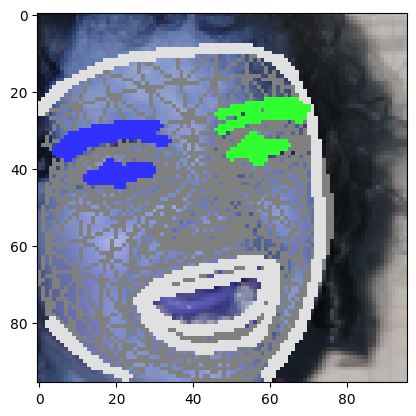

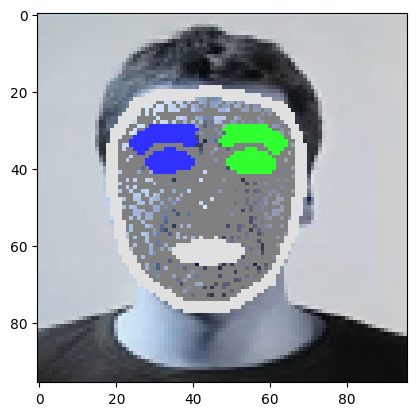

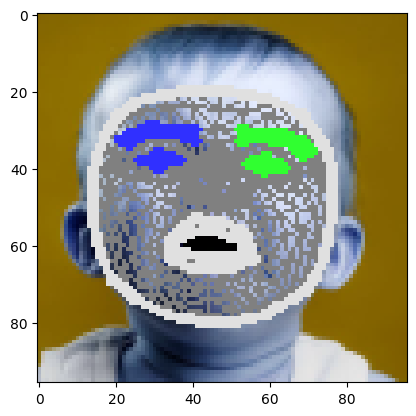

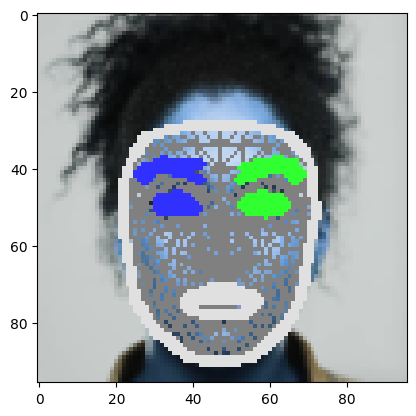

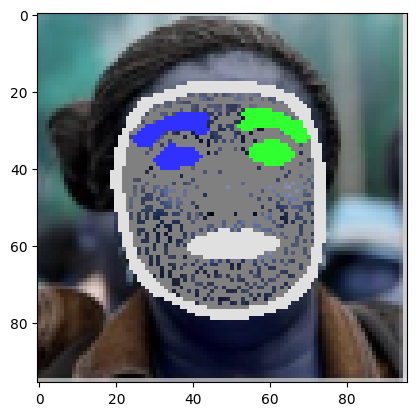

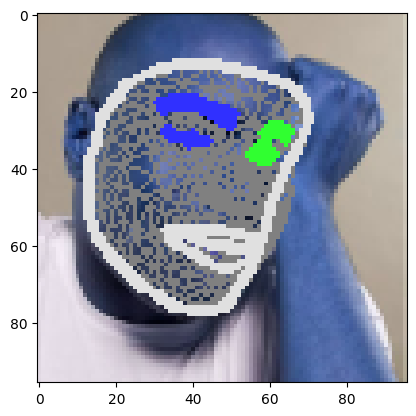

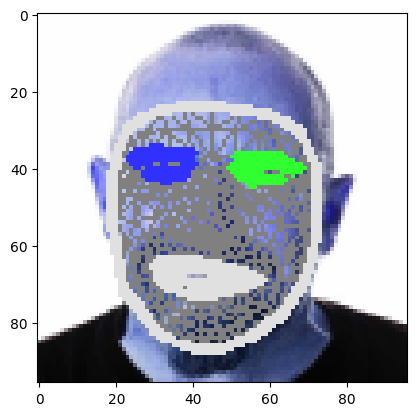

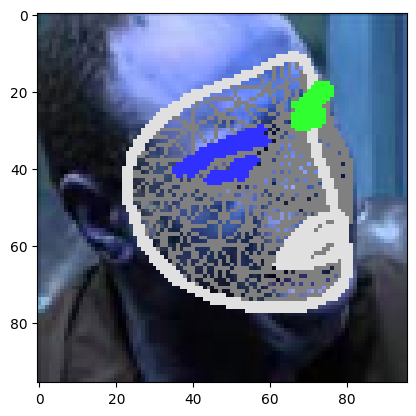

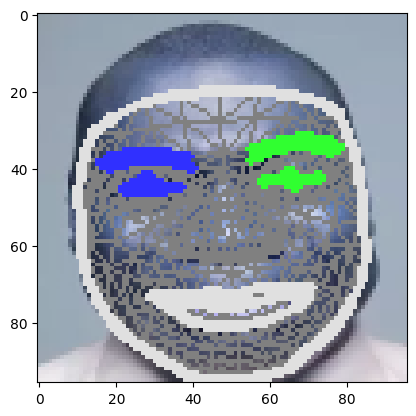

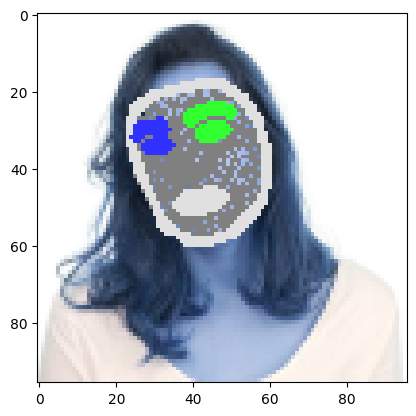

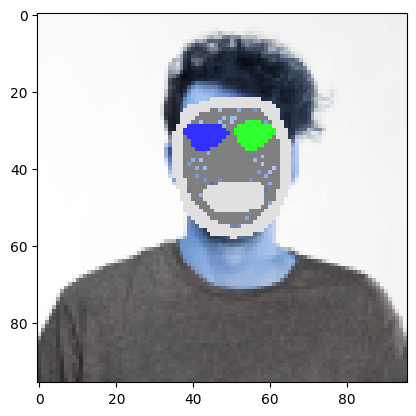

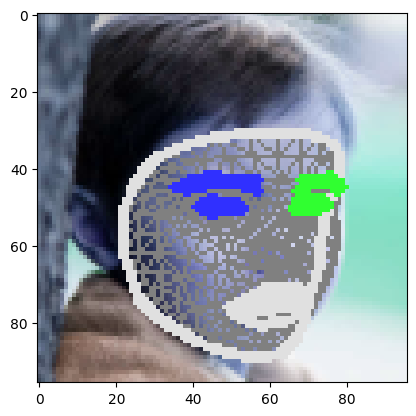

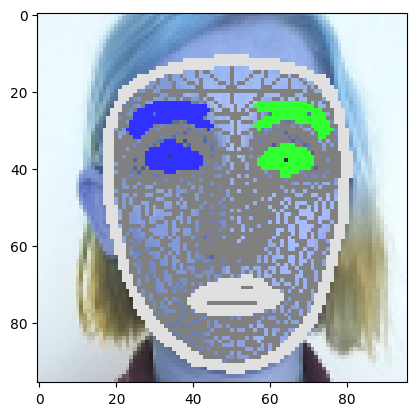

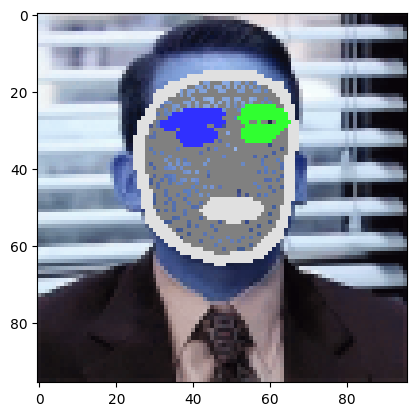

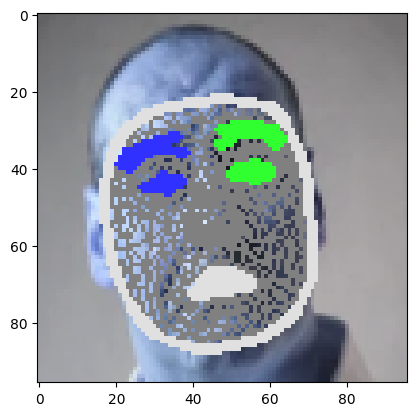

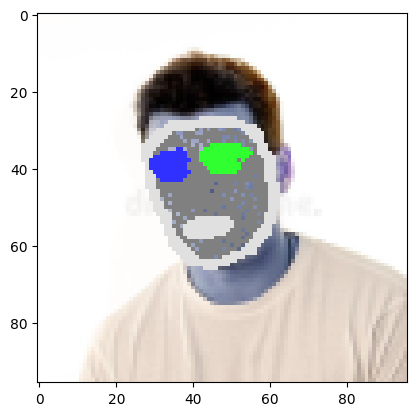

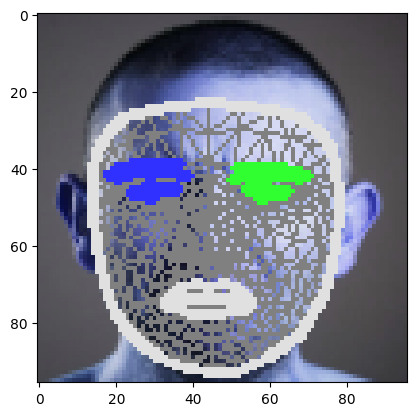

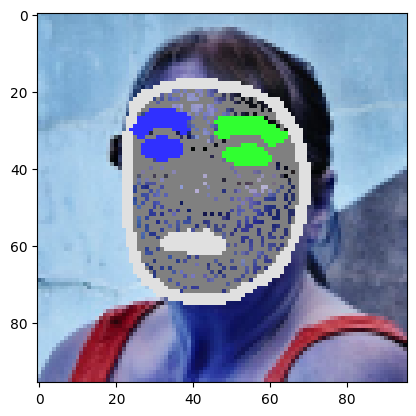

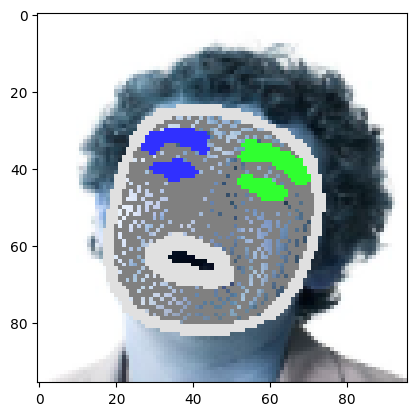

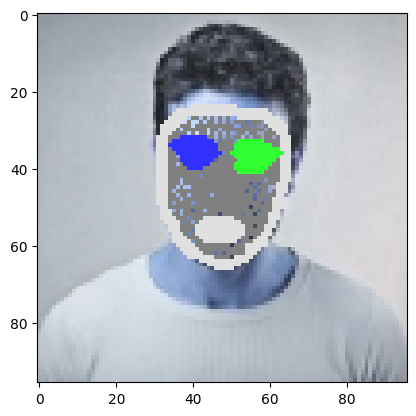

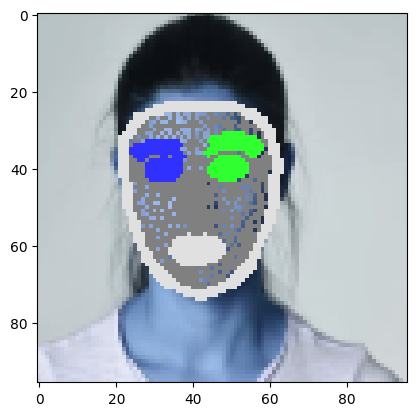

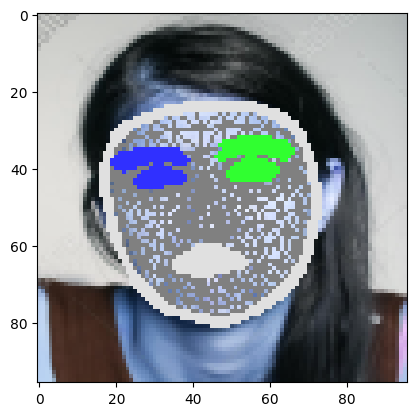

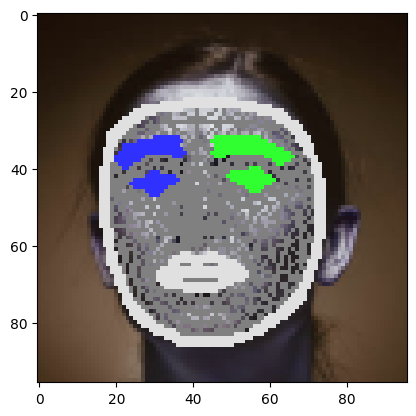

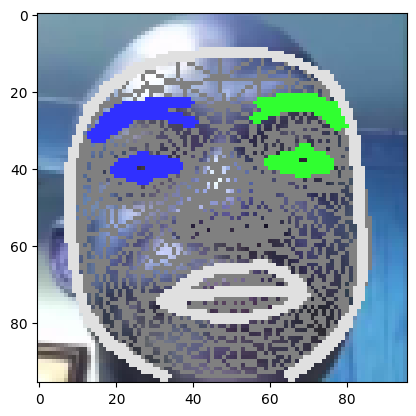

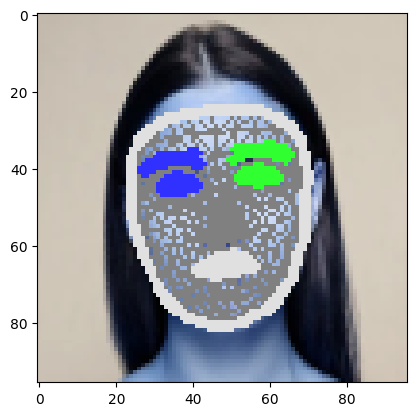

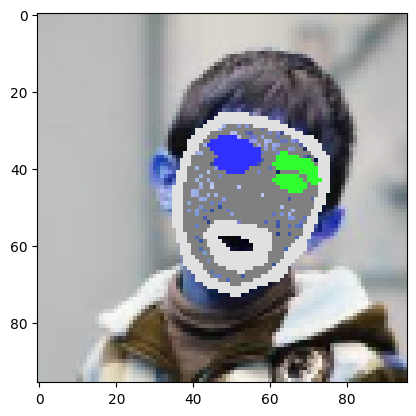

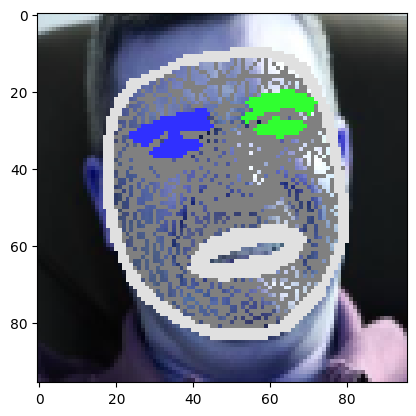

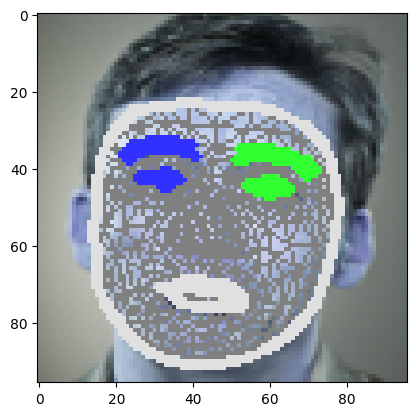

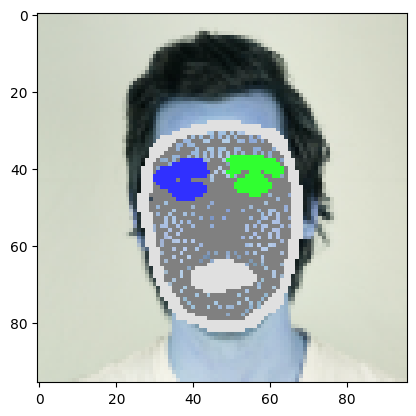

In [47]:
display_images_in_dir("/content/working/")


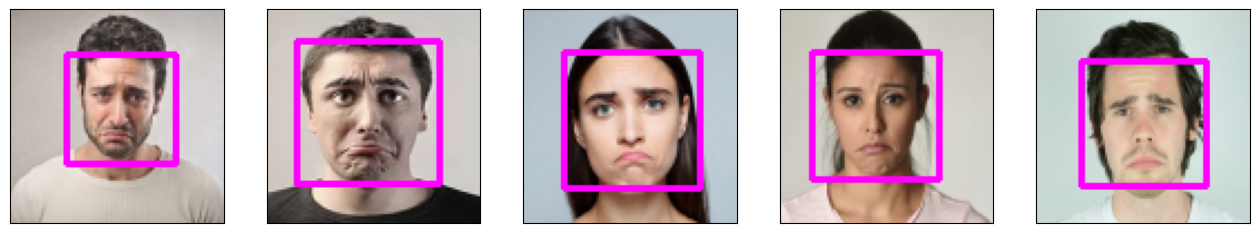

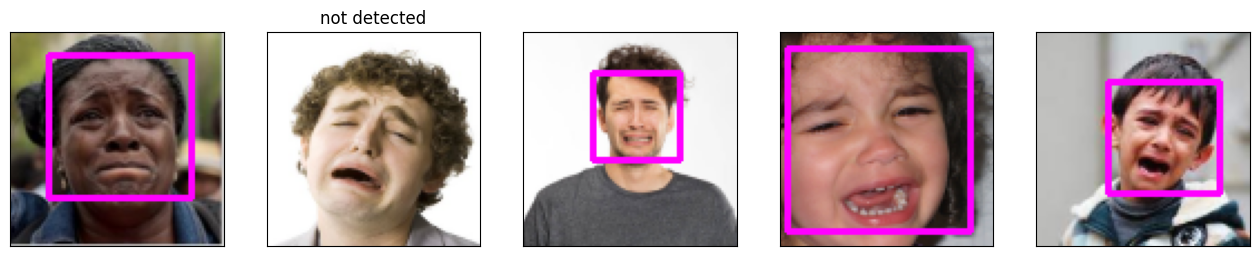

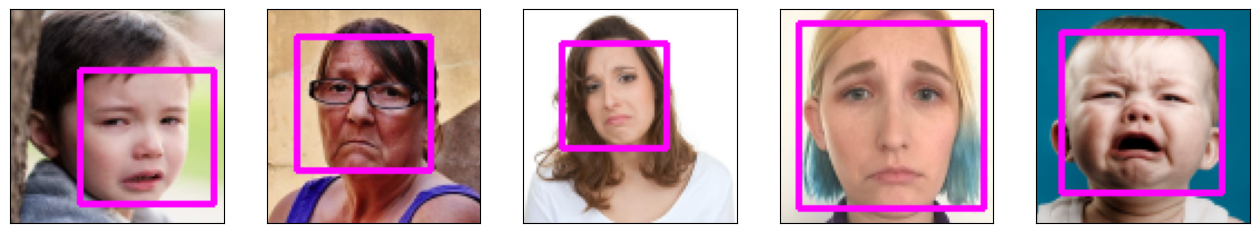

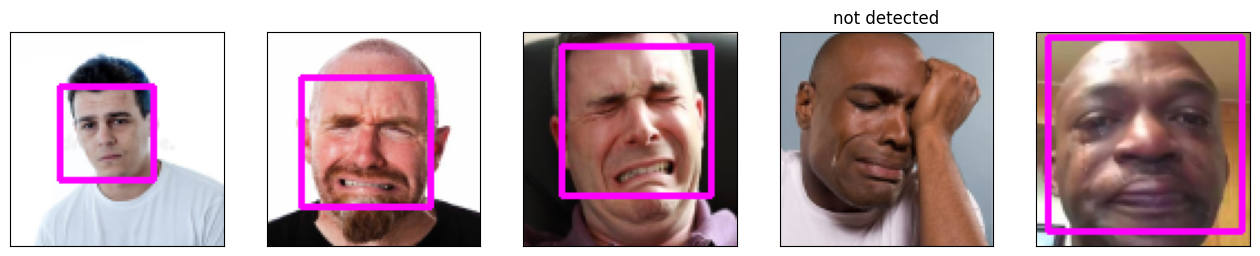

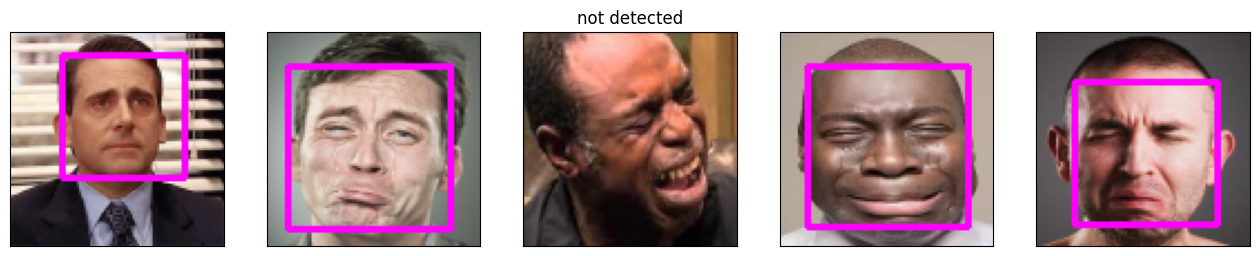

In [48]:
display_face_detection_grid(paths)

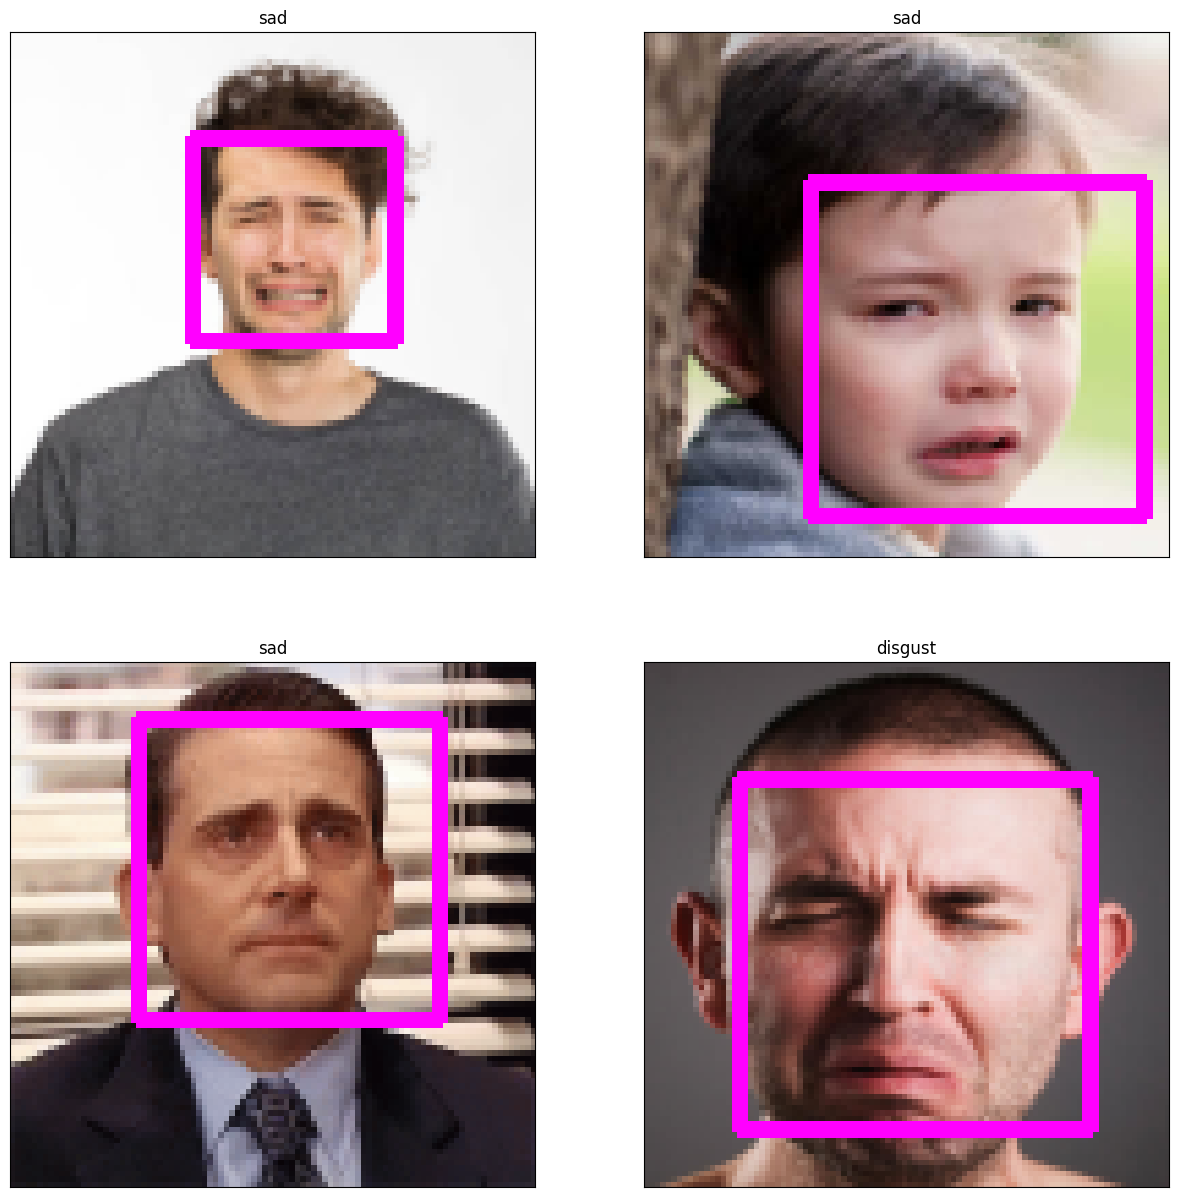

In [49]:
display_and_analyze_emotions(paths)